# Taller 5

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm


## 1. Ecuación diferencial de Poisson



In [2]:
h=0.1
x=np.arange(0,20,h)
y=np.arange(0,20,h)

In [3]:
def h1(x,y):
    return 10.

def h2(x,y):
    return 0.

def h3 (x,y):
    return 0.

def h4(x,y):
    return 0.

In [4]:
def initT():
    T = np.zeros((len(y),len(x)))
    T[0,:] = h1(x[0],y[0])
    T[20,:] = h2(x[0],y[0])
    T[:,0] = h3(x[0],y[0])
    T[:,20] = h4(x[0],y[0])
    return T

In [5]:
T=initT()
T

array([[ 0., 10., 10., ..., 10., 10., 10.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
def Poisson(x,y):
    return np.exp(-x*y)

In [7]:
def Relajacion(T,f,Nit = int(1e5), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )+ 0.25*h**2 * f(x[i],y[i])
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        

In [8]:
T_sol,itmax=Relajacion(T,Poisson)


  3%|▎         | 2518/100000 [14:38<9:26:42,  2.87it/s] 

2518


<IPython.core.display.Javascript object>


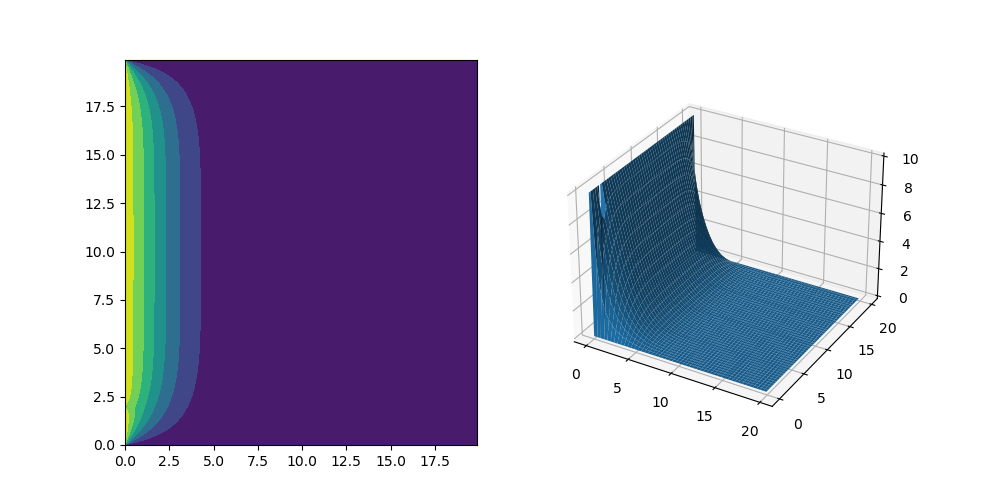

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,T_sol.T)

ax1.plot_surface(X,Y,T_sol.T)

## 2. Conducción de calor 2D

### a)

In [10]:
dx=0.2
dy=0.2
dt=0.1 
x=np.arange(0,1,dx)
y=np.arange(0,1,dy)
t=np.arange(0,1,dt)
alpha=1
beta=1

lambda_ = (alpha*dt)/dx**2
mu_ = (beta*dt)/dy**2

len(x),len(t)

(5, 10)

In [11]:
def Ti(x,y,t):
    return np.sin(np.pi*(x+y))

### b)

In [12]:
def h6(x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*y)

def h7(x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*x)

def h8 (x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(1+y))

def h9(x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(1+x))


In [13]:

def InitT():
    
    T = np.zeros((len(t),len(x),len(y)))
    T[0,:,:]=Ti(x,y,t)
    for l in range(len(t)):
        T[l,:,0] = h6(0,y,t[l])
        T[l,0,:] = h7(x,0,t[l])
        T[l,:,-1] = h8(x[-1],y,t[l])
        T[l,-1,:] = h9(x,y[-1],t[l])
    
    return T


In [14]:
T=InitT()

In [15]:
def GetSolution():
    
    omega=0.05
    for l in range(1,len(t)):
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                Tmp = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                
                T[l,i,j] += omega*(Tmp - T[l,i,j])
                

In [16]:
GetSolution()

<IPython.core.display.Javascript object>


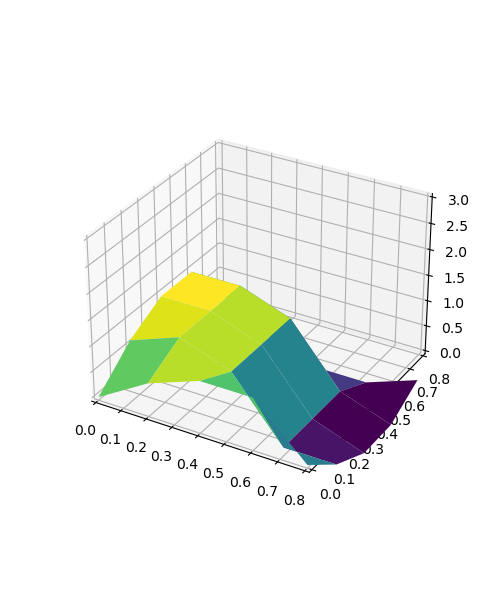

In [17]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,0.8)
    ax.set_ylim3d(0,0.8)
    ax.set_zlim3d(0,3)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)


## 3. Ecuación de onda 2D en coordenadas cilíndricas


Partiendo de las formulas generales de coordenadas polares


$$
\begin{align*}
\rho&=\sqrt{x^2+y^2}\\
\phi&=arctan({\frac{y}{x}})
\end {align*}
$$


Para la construcción del laplaciano se necesitan sus derivadas parciales, las cuales están dadas por:

$$
\begin{align*}
{\frac{\partial \rho}{\partial x}}&=\frac{x}{\sqrt{x^2+y^2}}\\
{\frac{\partial \rho}{\partial y}}&=\frac{y}{\sqrt{x^2+y^2}}\\
{\frac{\partial \phi}{\partial x}}&=\frac{-y}{x^2+y^2}\\
{\frac{\partial \phi}{\partial y}}&=\frac{x}{x^2+y^2}\\
\end {align*}
$$

Teniendo en cuenta que se quiere dejar es en terminos de $\rho$ y $\phi$, entonces hay que reescribir esas ecuaciones partiendo de la siguiente relación:


$$
\begin{align*}
x&=\rho cos \phi\\
y&=\rho sin \phi
\end {align*}
$$

Quedando de la siguiente forma:

$$
\begin{align*}
{\frac{\partial \rho}{\partial x}}&=cos \phi\\
{\frac{\partial \rho}{\partial y}}&=sin \phi\\
{\frac{\partial \phi}{\partial x}}&=\frac{-sin \phi}{\rho}\\
{\frac{\partial \phi}{\partial y}}&=\frac{cos \phi}{\rho}\\
\end {align*}
$$

Ahora, se tiene que la ecuación de onda esta descrita por la formula

$$
\begin{align*}
\frac{\partial^2u}{\partial t^2}=\alpha^2 *\triangledown^2 u \\
\frac{\partial^2u}{\partial t^2}=\alpha^2 *(\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}) \\
\end {align*}
$$

Por ello, debemos entonces encontrar el valor de las dos segundas derivadas parciales de u. \\
Con x:

$$
\frac{\partial^2u}{\partial x^2}=\frac{\partial}{\partial x}(\frac{\partial u}{\partial \rho}\frac{\partial \rho}{\partial x}+\frac{\partial u}{\partial \phi}\frac{\partial \phi}{\partial x}) \\
\frac{\partial^2u}{\partial x^2}=\frac{\partial^2u}{\partial \rho^2}cos^2\phi+\frac{\partial^2u}{\partial \phi^2} \frac{sin^2\phi}{\rho^2}-\frac{\partial^2u}{\partial \rho\partial \phi} \frac{sin (2\phi)}{\rho}+\frac{\partial u}{\partial \rho} \frac{sin^2\phi}{\rho}+ \frac{\partial u}{\partial \phi} \frac{sin (2\phi)}{\rho^2}\\
$$

con y:

$$
\frac{\partial^2u}{\partial y^2}=\frac{\partial}{\partial y}(\frac{\partial u}{\partial \rho}\frac{\partial \rho}{\partial y}+\frac{\partial u}{\partial \phi}\frac{\partial \phi}{\partial y}) \\
\frac{\partial^2u}{\partial y^2}=\frac{\partial^2u}{\partial \rho^2}sin^2\phi+\frac{\partial^2u}{\partial \phi^2} \frac{cos^2\phi}{\rho^2}+\frac{\partial^2u}{\partial \rho\partial \phi} \frac{sin (2\phi)}{\rho}+\frac{\partial u}{\partial \rho} \frac{cos^2\phi}{\rho}- \frac{\partial u}{\partial \phi} \frac{sin (2\phi)}{\rho^2}\\
$$

Reemplazando en la ecuación de onda:

$$
\frac{\partial^2u}{\partial t^2}=\alpha^2 *\triangledown^2 u \\
\frac{\partial^2u}{\partial t^2}=\alpha^2 *(\frac{\partial^2u}{\partial \rho^2}cos^2\phi+\frac{\partial^2u}{\partial \phi^2} \frac{sin^2\phi}{\rho^2}-\frac{\partial^2u}{\partial \rho\partial \phi} \frac{sin (2\phi)}{\rho}+\frac{\partial u}{\partial \rho} \frac{sin^2\phi}{\rho}+ \frac{\partial u}{\partial \phi} \frac{sin (2\phi)}{\rho^2}  +   \frac{\partial^2u}{\partial \rho^2}sin^2\phi+\frac{\partial^2u}{\partial \phi^2} \frac{cos^2\phi}{\rho^2}+\frac{\partial^2u}{\partial \rho\partial \phi} \frac{sin (2\phi)}{\rho}+\frac{\partial u}{\partial \rho} \frac{cos^2\phi}{\rho}- \frac{\partial u}{\partial \phi} \frac{sin (2\phi)}{\rho^2}) \\
$$

Cancelando terminos:

$$
\frac{\partial^2u}{\partial t^2}=\alpha^2 *(\frac{1}{\rho}\frac{\partial u}{\partial \rho}+\frac{1}{\rho^2}\frac{\partial^2 u}{\partial \phi^2}+\frac{\partial^2u}{\partial \rho^2})
$$

Por ultimo, se debe discretizar la ecuación.

$$
\frac{u_{i,j}^{l+1}-2u_{i,j}^{l}+u_{i,j}^{l-1}}{(\Delta t)^2}=\alpha^2(\Delta t)^2( \frac{u_{i-1,j}^{l}-2u_{i,j}^{l}+u_{i+1,j}^{l}}{(\Delta \rho)^2}+ \frac{1}{\rho[i]}\frac{u_{i,j}^{l}-u_{i-1,j}^{l}}{(\Delta \rho)}+\frac{1}{\rho[i]^2} \frac {u_{i,j-1}^{l}-2u_{i,j}^{l}+u_{i,j+1}^{l}}{(\Delta \phi)^2})\\
u_{i,j}^{l+1}=\alpha^2(\Delta t)^2( \frac{u_{i-1,j}^{l}-2u_{i,j}^{l}+u_{i+1,j}^{l}}{(\Delta \rho)^2}+ \frac{1}{\rho[i]}\frac{u_{i,j}^{l}-u_{i-1,j}^{l}}{(\Delta \rho)}+\frac{1}{\rho[i]^2} \frac {u_{i,j-1}^{l}-2u_{i,j}^{l}+u_{i,j+1}^{l}}{(\Delta \phi)^2})+2 u_{i,j}^{l}-u_{i,j}^{l-1}
$$

Donde, si tomamos $\lambda=\frac{\Delta \rho}{\Delta \phi}$  y $v=\frac{α\Delta t}{\Delta \rho}$
Como se quiere que esas dos variables salgan en la ecuacion, se va a manipular un poco la formula. 

$$
u_{i,j}^{l+1}=\frac{\alpha^2(\Delta t)^2}{(\Delta \rho)^2}( \frac{u_{i-1,j}^{l}-2u_{i,j}^{l}+u_{i+1,j}^{l}}{1}+ \frac{1}{\rho[i]}\frac{u_{i,j}^{l}-u_{i-1,j}^{l}}{(\Delta \rho)^{-1}}+\frac{1}{\rho[i]^2} \frac {u_{i,j-1}^{l}-2u_{i,j}^{l}+u_{i,j+1}^{l}}{(\Delta \phi)^2(\Delta \rho)^{-2}})+2 u_{i,j}^{l}-u_{i,j}^{l-1}\\
u_{i,j}^{l+1}=(\frac{\alpha\Delta t}{\Delta \rho})^2( u_{i-1,j}^{l}-2u_{i,j}^{l}+u_{i+1,j}^{l}+ \frac{\Delta \rho}{\rho[i]}(u_{i,j}^{l}-u_{i-1,j}^{l})+\frac{(\Delta \rho)^{2}}{\rho[i]^2 (\Delta \phi)^2} (u_{i,j-1}^{l}-2u_{i,j}^{l}+u_{i,j+1}^{l})+2 u_{i,j}^{l}-u_{i,j}^{l-1}\\
$$

Ahora, ya ahi es posible observar mas claramente donde se puede reemplazar $\lambda$ y v. LLegando de esta manera a la formula esperada.

$$
u_{i,j}^{l+1}=v^2( u_{i-1,j}^{l}-2u_{i,j}^{l}+u_{i+1,j}^{l}+ \frac{\Delta \rho}{\rho[i]}(u_{i,j}^{l}-u_{i-1,j}^{l})+(\frac{\lambda}{\rho[i] })^2 (u_{i,j-1}^{l}-2u_{i,j}^{l}+u_{i,j+1}^{l})+2 u_{i,j}^{l}-u_{i,j}^{l-1}\\
$$

## 5. Ecuación de Onda 2D

In [18]:
Nt = 400
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 2.

lambda_ = v*deltat/deltax
mu_ = 5*deltat/deltay

print(lambda_,mu_)

0.14285714285714285 0.35714285714285715


In [19]:
def ui(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

In [20]:
u = np.zeros((Nt,Nx,Ny))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [21]:
def GetSolution():
    
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j] \
                    + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] ) \
                    + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] ) \
                    - u[l-2,i,j] 

In [22]:
GetSolution()

100%|██████████| 399/399 [00:00<00:00, 459.97it/s]


<IPython.core.display.Javascript object>


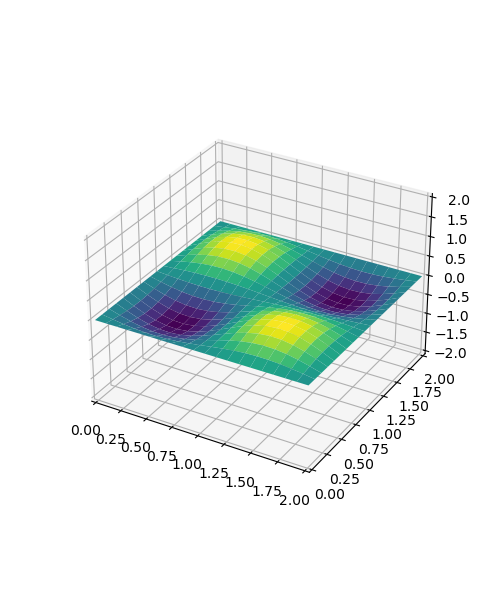

In [24]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,2)
    ax.set_ylim3d(0,2)
    ax.set_zlim3d(-2,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
